# **What makes an MVP?**
**An exploratory data analysis to determine key factors in NBA MVP Success**

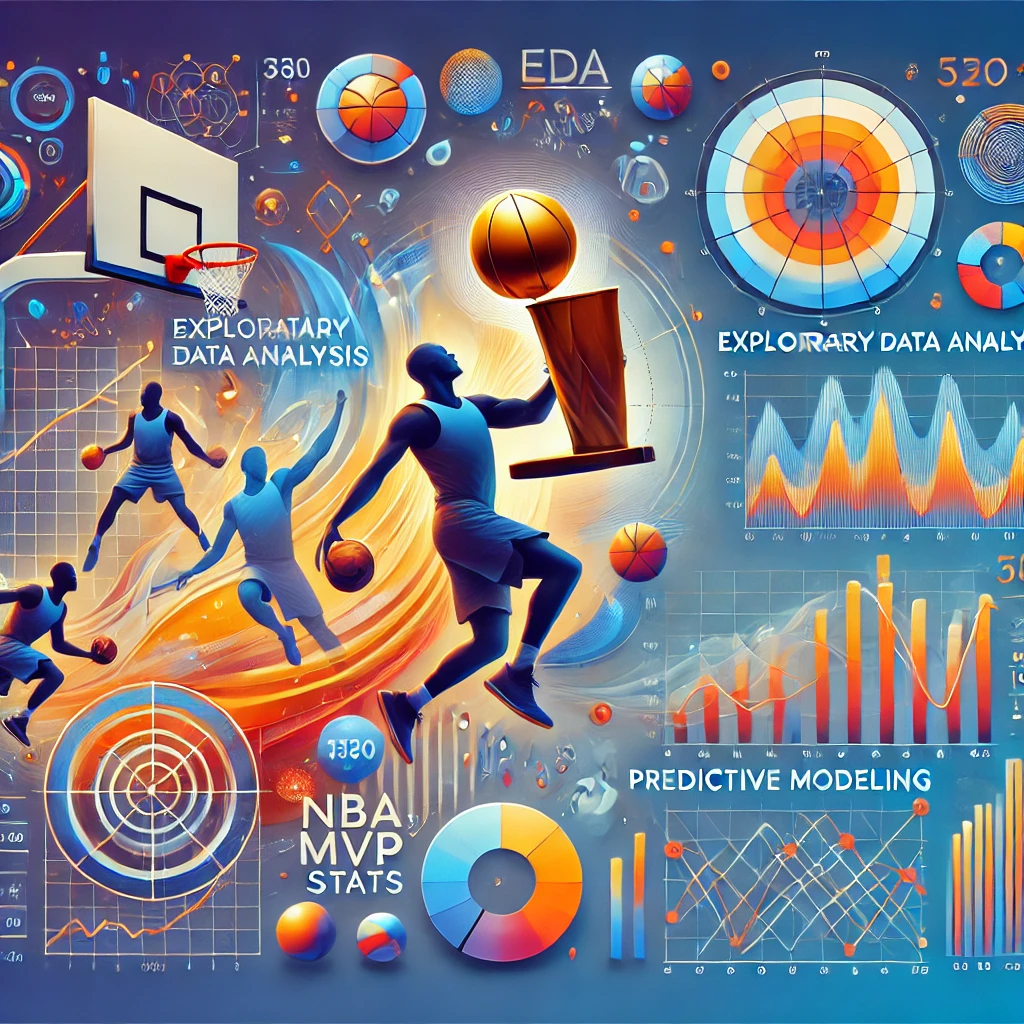

**Introduction:**

The NBA's Most Valuable Player (MVP) award is one of the most prestigious individual honors in professional basketball, recognizing a player's outstanding performance and contribution to their team. However, the criteria for selecting an MVP can sometimes seem subjective, as it involves a combination of statistical dominance, team success, and overall impact on the game.

In this project, I aim to take an analytical approach to understanding the key factors that contribute to winning the MVP award. Specifically, I seek to answer the question: "Which player statistics are most predictive of winning the MVP award?" By exploring historical NBA player data, this study will identify trends and patterns that consistently emerge among MVP winners. I will examine a wide range of individual statistics, including points, assists, rebounds, steals, and advanced metrics like Player Efficiency Rating (PER) and Win Shares, to determine the most influential predictors of MVP success.

This analysis will provide insights into the statistical profiles of MVP-caliber players and offer a data-driven perspective on what it takes to earn this coveted honor.

**Hypotheses:**

- Certain stats, like points per game (PPG), player efficiency rating (PER), or team success (wins), may be strong indicators of MVP candidates.
- More advanced metrics (e.g., Win Shares, Box Plus-Minus) may provide better predictive power than traditional stats (points, rebounds, assists).

# **Data Collection**

I will be using the publicly available [NBA-Stats API](https://https://github.com/swar/nba_api) in order to access historical NBA data for analysis. I will also use [Basketball Reference](https://www.basketball-reference.com/) for access to advanced metrics such as PER, Win Shares, and MVP results per year.

In [14]:
!pip install nba_api

I will gather player data from the previous 10 years in order to analyze.

In [15]:
from nba_api.stats.endpoints import leaguedashplayerstats
import pandas as pd
# Creates list of past 10 seasons to use for dataframe
seasons = ["2014-15", "2015-16", "2016-17", "2017-18", "2018-19", "2019-20", "2020-21", "2021-22", "2022-23", "2023-24"]

# Initialize empty pandas dataframe for player stats
all_player_stats = pd.DataFrame()

# Iterate through all 10 seasons and add the player stats from that season to the previously initialized dataframe
for season in seasons:
  player_stats = leaguedashplayerstats.LeagueDashPlayerStats(season=season).get_data_frames()[0]
  player_stats['Season'] = season
  all_player_stats = pd.concat([all_player_stats, player_stats], ignore_index=True)

# Show maximum columns for the dataframe
pd.set_option('display.max_columns', None)

# Show the first 5 rows of data for exploration
all_player_stats.head()

,PLAYER_ID,PLAYER_NAME,NICKNAME,TEAM_ID,TEAM_ABBREVIATION,AGE,GP,W,L,W_PCT,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,PTS,PLUS_MINUS,NBA_FANTASY_PTS,DD2,TD3,WNBA_FANTASY_PTS,GP_RANK,W_RANK,L_RANK,W_PCT_RANK,MIN_RANK,FGM_RANK,FGA_RANK,FG_PCT_RANK,FG3M_RANK,FG3A_RANK,FG3_PCT_RANK,FTM_RANK,FTA_RANK,FT_PCT_RANK,OREB_RANK,DREB_RANK,REB_RANK,AST_RANK,TOV_RANK,STL_RANK,BLK_RANK,BLKA_RANK,PF_RANK,PFD_RANK,PTS_RANK,PLUS_MINUS_RANK,NBA_FANTASY_PTS_RANK,DD2_RANK,TD3_RANK,WNBA_FANTASY_PTS_RANK,Season
0,201985,AJ Price,AJ,1610612739,CLE,28.0,26,11,15,0.423,323.490000,51,137,0.372,15,57,0.263,16,24,0.667,6,26,32,46,14,7,0,5,15,31,133,-64,247.4,0,0,240.0,400,384,113,319,391,374,369,408,255,246,313,374,376,345,415,404,414,302,394,402,442,100,57,358,376,339,385,252,21,384,2014-15
1,201166,Aaron Brooks,Aaron,1610612741,CHI,30.0,82,50,32,0.610,1884.613333,344,817,0.421,121,313,0.387,145,174,0.833,32,134,166,261,157,54,15,52,189,148,954,209,1594.7,1,0,1640.0,2,40,310,135,126,82,74,279,35,44,70,94,117,93,241,251,257,52,40,124,222,435,439,115,79,52,122,193,21,102,2014-15
2,203932,Aaron Gordon,Aaron,1610612753,ORL,19.0,47,14,33,0.298,796.925000,93,208,0.447,13,48,0.271,44,61,0.721,46,123,169,33,38,21,22,15,83,52,243,-163,586.3,1,0,544.0,312,352,328,412,314,313,324,191,261,254,306,281,281,281,196,269,253,342,308,303,154,202,207,301,320,434,317,193,21,318,2014-15
3,203940,Adreian Payne,Adreian,1610612750,MIN,24.0,32,7,25,0.219,739.638333,91,220,0.414,1,9,0.111,30,46,0.652,48,114,162,30,44,19,9,10,88,43,213,-244,492.4,3,0,462.0,374,421,224,448,322,317,315,303,356,349,375,328,314,361,192,283,264,351,288,318,295,155,219,322,334,460,332,122,21,335,2014-15
4,201143,Al Horford,Al,1610612737,ATL,29.0,76,56,20,0.737,2318.166667,519,965,0.538,11,36,0.306,107,141,0.759,131,413,544,244,100,68,98,37,121,126,1156,287,2572.8,14,1,2287.0,87,11,158,32,55,17,42,45,274,280,258,153,160,228,53,25,31,59,121,83,23,380,287,156,41,29,26,46,13,32,2014-15


In [16]:
# Show the last 5 rows of the dataframe for exploration
all_player_stats.tail()

,PLAYER_ID,PLAYER_NAME,NICKNAME,TEAM_ID,TEAM_ABBREVIATION,AGE,GP,W,L,W_PCT,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,PTS,PLUS_MINUS,NBA_FANTASY_PTS,DD2,TD3,WNBA_FANTASY_PTS,GP_RANK,W_RANK,L_RANK,W_PCT_RANK,MIN_RANK,FGM_RANK,FGA_RANK,FG_PCT_RANK,FG3M_RANK,FG3A_RANK,FG3_PCT_RANK,FTM_RANK,FTA_RANK,FT_PCT_RANK,OREB_RANK,DREB_RANK,REB_RANK,AST_RANK,TOV_RANK,STL_RANK,BLK_RANK,BLKA_RANK,PF_RANK,PFD_RANK,PTS_RANK,PLUS_MINUS_RANK,NBA_FANTASY_PTS_RANK,DD2_RANK,TD3_RANK,WNBA_FANTASY_PTS_RANK,Season
5304,203897,Zach LaVine,Zach,1610612741,CHI,29.0,25,10,15,0.400,871.861667,170,376,0.452,59,169,0.349,88,103,0.854,8,121,129,98,52,21,8,20,57,70,487,-92,823.8,1,0,831.0,411,403,168,385,291,227,226,285,211,205,264,163,176,108,436,262,299,225,232,312,331,335,249,230,225,451,269,190,38,262,2023-24
5305,1630285,Zavier Simpson,Zavier,1610612763,MEM,27.0,7,1,6,0.143,161.383333,17,54,0.315,5,17,0.294,3,4,0.750,4,16,20,25,10,7,3,7,11,3,42,-29,123.5,0,0,112.0,518,538,80,542,448,456,440,530,408,412,390,470,475,307,473,463,469,391,417,417,428,199,103,485,460,352,448,257,38,447,2023-24
5306,1630192,Zeke Nnaji,Zeke,1610612743,DEN,23.0,58,41,17,0.707,576.120000,69,149,0.463,6,23,0.261,42,62,0.677,61,64,125,32,27,15,38,23,81,77,186,-168,516.0,0,0,455.0,232,97,199,49,343,354,358,241,402,398,427,267,249,418,146,351,306,369,328,348,108,358,314,215,351,508,332,257,38,340,2023-24
5307,1630533,Ziaire Williams,Ziaire,1610612763,MEM,22.0,51,20,31,0.392,1037.681667,150,378,0.397,58,189,0.307,62,75,0.827,35,145,180,75,66,36,9,27,85,74,420,-247,817.5,1,0,823.0,284,297,406,396,256,250,222,453,214,191,366,209,223,156,256,222,246,270,183,230,319,382,320,225,246,535,271,190,38,265,2023-24
5308,1629627,Zion Williamson,Zion,1610612740,NOP,23.0,70,42,28,0.600,2206.923333,624,1094,0.570,6,18,0.333,347,494,0.702,122,284,406,352,193,76,47,121,159,362,1601,143,2792.2,12,0,2611.0,128,88,361,170,69,21,38,65,402,410,302,17,11,383,47,78,70,42,16,42,68,571,495,13,25,89,31,54,38,35,2023-24


So I now have a dataframe from the api that includes player data from the previous 10 seasons. However, it does not have any of the advanced metrics I'd like to look at. So I've downloaded the data from Basketball Reference, and will load it in below.

In [24]:
import os

directory = '/content/drive/MyDrive/NBA Data'

# Initialize an empty dataframe for the advanced stats
all_advanced_stats = pd.DataFrame()

# Loop through each file in the directory
for filename in os.listdir(directory):
    if filename.endswith(".csv"):  # Only process files with the .csv extension
        # Construct the full file path
        file_path = os.path.join(directory, filename)

        # Extract the end year from the filename
        end_year = int(filename.split('_')[1])
        start_year = end_year - 1  # Calculate the start year

        # Format the season as 'start_year-end_year'
        season = f"{start_year}-{str(end_year)[-2:]}"

        try:
            # Try reading the CSV with 'utf-8' encoding
            df = pd.read_csv(file_path, encoding='utf-8')
        except UnicodeDecodeError:
            # If a UnicodeDecodeError occurs, use 'latin1' encoding
            df = pd.read_csv(file_path, encoding='latin1')

        # Add a 'Season' column to the dataframe
        df['Season'] = season

        # Add stats to advanced stats dataframe
        all_advanced_stats = pd.concat([all_advanced_stats, df], ignore_index=True)


all_advanced_stats.head()

,Rk,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,Unnamed: 19,OWS,DWS,WS,WS/48,Unnamed: 24,OBPM,DBPM,BPM,VORP,Player-additional,Season
0,1,Precious Achiuwa,PF-C,24,TOT,74,1624,14.6,0.545,0.207,0.239,13.0,20.5,16.7,8.4,1.4,3.9,13.8,15.9,NaN,1.2,2.2,3.4,0.102,NaN,-1.7,0.3,-1.4,0.2,achiupr01,2023-24
1,1,Precious Achiuwa,C,24,TOR,25,437,15.0,0.512,0.276,0.247,12.3,22.1,17.1,14.5,1.8,2.4,13.3,21.2,NaN,0.0,0.4,0.4,0.048,NaN,-1.4,-0.2,-1.6,0.0,achiupr01,2023-24
2,1,Precious Achiuwa,PF,24,NYK,49,1187,14.5,0.564,0.167,0.234,13.3,19.9,16.6,6.2,1.3,4.4,14.1,14.0,NaN,1.2,1.8,3.0,0.122,NaN,-1.9,0.5,-1.4,0.2,achiupr01,2023-24
3,2,Bam Adebayo,C,26,MIA,71,2416,19.8,0.576,0.041,0.381,7.4,27.3,17.3,18.9,1.7,2.7,12.0,24.9,NaN,2.9,4.3,7.2,0.144,NaN,0.8,1.7,2.4,2.7,adebaba01,2023-24
4,3,Ochai Agbaji,SG,23,TOT,78,1641,7.7,0.497,0.487,0.129,4.9,9.6,7.2,6.6,1.4,2.4,12.3,13.4,NaN,-0.5,0.6,0.1,0.002,NaN,-3.5,-0.9,-4.4,-1.0,agbajoc01,2023-24


In [25]:
all_advanced_stats.tail()

,Rk,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,Unnamed: 19,OWS,DWS,WS,WS/48,Unnamed: 24,OBPM,DBPM,BPM,VORP,Player-additional,Season
6773,490,Thaddeus Young,PF,26,TOT,76,2434,15.7,0.507,0.119,0.207,5.8,13.5,9.6,12.4,2.6,0.8,10.0,21.5,NaN,1.6,1.4,3.1,0.061,NaN,0.0,-0.2,-0.1,1.1,youngth01,2014-15
6774,490,Thaddeus Young,PF,26,MIN,48,1605,15.0,0.491,0.101,0.201,5.2,12.5,8.7,14.7,2.7,0.8,9.7,21.2,NaN,0.8,0.6,1.4,0.043,NaN,-0.4,-0.1,-0.5,0.6,youngth01,2014-15
6775,490,Thaddeus Young,PF,26,BRK,28,829,17.1,0.539,0.153,0.217,7.1,15.4,11.2,8.0,2.4,0.8,10.5,22.0,NaN,0.8,0.8,1.6,0.095,NaN,0.7,-0.3,0.5,0.5,youngth01,2014-15
6776,491,Cody Zeller,C,22,CHO,62,1487,14.1,0.530,0.003,0.440,7.0,20.1,13.4,10.9,1.2,2.6,12.2,15.6,NaN,1.6,2.2,3.8,0.123,NaN,-2.0,1.4,-0.6,0.5,zelleco01,2014-15
6777,492,Tyler Zeller,C,25,BOS,82,1731,18.9,0.594,0.000,0.300,9.1,20.5,14.7,10.8,0.5,2.3,9.8,19.6,NaN,4.5,2.0,6.5,0.179,NaN,1.0,0.0,0.9,1.3,zellety01,2014-15


# **Data Cleaning & Preprocessing**

Now that I have a dataframe full of the advanced stats for the previous seasons, I will select a few of them to add to our original dataset. The stats we will focus on will be PER, Win Shares, Box Plus-Minus, and True Shooting percentage as indicated in my hypothesis.

In [26]:
advanced_stats_selected = all_advanced_stats[['Player', 'Season', 'PER', 'WS','BPM', 'TS%']]

advanced_stats_selected.head()

,Player,Season,PER,WS,BPM,TS%
0,Precious Achiuwa,2023-24,14.6,3.4,-1.4,0.545
1,Precious Achiuwa,2023-24,15.0,0.4,-1.6,0.512
2,Precious Achiuwa,2023-24,14.5,3.0,-1.4,0.564
3,Bam Adebayo,2023-24,19.8,7.2,2.4,0.576
4,Ochai Agbaji,2023-24,7.7,0.1,-4.4,0.497


In [27]:
advanced_stats_selected.tail()

,Player,Season,PER,WS,BPM,TS%
6773,Thaddeus Young,2014-15,15.7,3.1,-0.1,0.507
6774,Thaddeus Young,2014-15,15.0,1.4,-0.5,0.491
6775,Thaddeus Young,2014-15,17.1,1.6,0.5,0.539
6776,Cody Zeller,2014-15,14.1,3.8,-0.6,0.530
6777,Tyler Zeller,2014-15,18.9,6.5,0.9,0.594


Now time to clean the names in the dataframes to ensure they are compatible, and then combine the data into one dataset.


In [36]:
# Rename the 'Player' column in advanced_stats_selected to 'PLAYER_NAME'
advanced_stats_selected.rename(columns={'Player': 'PLAYER_NAME'}, inplace=True)

all_player_stats.loc[:, 'PLAYER_NAME'] = all_player_stats['PLAYER_NAME'].str.strip()
advanced_stats_selected.loc[:, 'PLAYER_NAME'] = advanced_stats_selected['PLAYER_NAME'].str.strip()

# If there are any special characters like '*', remove them from the 'PLAYER_NAME' column
advanced_stats_selected.loc[:, 'PLAYER_NAME'] = advanced_stats_selected['PLAYER_NAME'].str.replace('*', '', regex=False)

merged_player_stats = pd.merge(all_player_stats, advanced_stats_selected, on=['PLAYER_NAME', 'Season'], how='left')

# Handle missing values (fill with 0)
merged_player_stats[['PER', 'WS', 'TS%', 'BPM']] = merged_player_stats[['PER', 'WS', 'TS%', 'BPM']].fillna(0)

merged_player_stats.head()

<ipython-input-36-c2a55ffda722>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  advanced_stats_selected.rename(columns={'Player': 'PLAYER_NAME'}, inplace=True)


,PLAYER_ID,PLAYER_NAME,NICKNAME,TEAM_ID,TEAM_ABBREVIATION,AGE,GP,W,L,W_PCT,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,PTS,PLUS_MINUS,NBA_FANTASY_PTS,DD2,TD3,WNBA_FANTASY_PTS,GP_RANK,W_RANK,L_RANK,W_PCT_RANK,MIN_RANK,FGM_RANK,FGA_RANK,FG_PCT_RANK,FG3M_RANK,FG3A_RANK,FG3_PCT_RANK,FTM_RANK,FTA_RANK,FT_PCT_RANK,OREB_RANK,DREB_RANK,REB_RANK,AST_RANK,TOV_RANK,STL_RANK,BLK_RANK,BLKA_RANK,PF_RANK,PFD_RANK,PTS_RANK,PLUS_MINUS_RANK,NBA_FANTASY_PTS_RANK,DD2_RANK,TD3_RANK,WNBA_FANTASY_PTS_RANK,Season,PER,WS,BPM,TS%
0,201985,AJ Price,AJ,1610612739,CLE,28.0,26,11,15,0.423,323.490000,51,137,0.372,15,57,0.263,16,24,0.667,6,26,32,46,14,7,0,5,15,31,133,-64,247.4,0,0,240.0,400,384,113,319,391,374,369,408,255,246,313,374,376,345,415,404,414,302,394,402,442,100,57,358,376,339,385,252,21,384,2014-15,0.0,0.0,0.0,0.000
1,201166,Aaron Brooks,Aaron,1610612741,CHI,30.0,82,50,32,0.610,1884.613333,344,817,0.421,121,313,0.387,145,174,0.833,32,134,166,261,157,54,15,52,189,148,954,209,1594.7,1,0,1640.0,2,40,310,135,126,82,74,279,35,44,70,94,117,93,241,251,257,52,40,124,222,435,439,115,79,52,122,193,21,102,2014-15,14.4,3.3,-0.8,0.534
2,203932,Aaron Gordon,Aaron,1610612753,ORL,19.0,47,14,33,0.298,796.925000,93,208,0.447,13,48,0.271,44,61,0.721,46,123,169,33,38,21,22,15,83,52,243,-163,586.3,1,0,544.0,312,352,328,412,314,313,324,191,261,254,306,281,281,281,196,269,253,342,308,303,154,202,207,301,320,434,317,193,21,318,2014-15,11.4,1.0,-2.7,0.517
3,203940,Adreian Payne,Adreian,1610612750,MIN,24.0,32,7,25,0.219,739.638333,91,220,0.414,1,9,0.111,30,46,0.652,48,114,162,30,44,19,9,10,88,43,213,-244,492.4,3,0,462.0,374,421,224,448,322,317,315,303,356,349,375,328,314,361,192,283,264,351,288,318,295,155,219,322,334,460,332,122,21,335,2014-15,7.7,-0.5,-6.9,0.443
4,203940,Adreian Payne,Adreian,1610612750,MIN,24.0,32,7,25,0.219,739.638333,91,220,0.414,1,9,0.111,30,46,0.652,48,114,162,30,44,19,9,10,88,43,213,-244,492.4,3,0,462.0,374,421,224,448,322,317,315,303,356,349,375,328,314,361,192,283,264,351,288,318,295,155,219,322,334,460,332,122,21,335,2014-15,2.9,0.0,-10.6,0.317


In [37]:
merged_player_stats.tail()

,PLAYER_ID,PLAYER_NAME,NICKNAME,TEAM_ID,TEAM_ABBREVIATION,AGE,GP,W,L,W_PCT,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,PTS,PLUS_MINUS,NBA_FANTASY_PTS,DD2,TD3,WNBA_FANTASY_PTS,GP_RANK,W_RANK,L_RANK,W_PCT_RANK,MIN_RANK,FGM_RANK,FGA_RANK,FG_PCT_RANK,FG3M_RANK,FG3A_RANK,FG3_PCT_RANK,FTM_RANK,FTA_RANK,FT_PCT_RANK,OREB_RANK,DREB_RANK,REB_RANK,AST_RANK,TOV_RANK,STL_RANK,BLK_RANK,BLKA_RANK,PF_RANK,PFD_RANK,PTS_RANK,PLUS_MINUS_RANK,NBA_FANTASY_PTS_RANK,DD2_RANK,TD3_RANK,WNBA_FANTASY_PTS_RANK,Season,PER,WS,BPM,TS%
6648,203897,Zach LaVine,Zach,1610612741,CHI,29.0,25,10,15,0.400,871.861667,170,376,0.452,59,169,0.349,88,103,0.854,8,121,129,98,52,21,8,20,57,70,487,-92,823.8,1,0,831.0,411,403,168,385,291,227,226,285,211,205,264,163,176,108,436,262,299,225,232,312,331,335,249,230,225,451,269,190,38,262,2023-24,15.1,1.5,0.1,0.578
6649,1630285,Zavier Simpson,Zavier,1610612763,MEM,27.0,7,1,6,0.143,161.383333,17,54,0.315,5,17,0.294,3,4,0.750,4,16,20,25,10,7,3,7,11,3,42,-29,123.5,0,0,112.0,518,538,80,542,448,456,440,530,408,412,390,470,475,307,473,463,469,391,417,417,428,199,103,485,460,352,448,257,38,447,2023-24,6.3,-0.2,-5.9,0.377
6650,1630192,Zeke Nnaji,Zeke,1610612743,DEN,23.0,58,41,17,0.707,576.120000,69,149,0.463,6,23,0.261,42,62,0.677,61,64,125,32,27,15,38,23,81,77,186,-168,516.0,0,0,455.0,232,97,199,49,343,354,358,241,402,398,427,267,249,418,146,351,306,369,328,348,108,358,314,215,351,508,332,257,38,340,2023-24,12.4,1.2,-3.7,0.528
6651,1630533,Ziaire Williams,Ziaire,1610612763,MEM,22.0,51,20,31,0.392,1037.681667,150,378,0.397,58,189,0.307,62,75,0.827,35,145,180,75,66,36,9,27,85,74,420,-247,817.5,1,0,823.0,284,297,406,396,256,250,222,453,214,191,366,209,223,156,256,222,246,270,183,230,319,382,320,225,246,535,271,190,38,265,2023-24,9.3,0.2,-4.5,0.511
6652,1629627,Zion Williamson,Zion,1610612740,NOP,23.0,70,42,28,0.600,2206.923333,624,1094,0.570,6,18,0.333,347,494,0.702,122,284,406,352,193,76,47,121,159,362,1601,143,2792.2,12,0,2611.0,128,88,361,170,69,21,38,65,402,410,302,17,11,383,47,78,70,42,16,42,68,571,495,13,25,89,31,54,38,35,2023-24,22.8,7.5,3.8,0.610


Now I will create a database of the MVP winners over the previous 10 years and add it to the merged dataset.

In [40]:
mvp_winners_data = {
    'PLAYER_NAME': ['Stephen Curry', 'Stephen Curry', 'Russell Westbrook', 'James Harden', 'Giannis Antetokounmpo',
                    'Giannis Antetokounmpo', 'Nikola Jokić', 'Nikola Jokić', 'Joel Embiid', 'Nikola Jokić'],
    'Season': ['2014-15', '2015-16', '2016-17', '2017-18', '2018-19', '2019-20', '2020-21', '2021-22', '2022-23', '2023-24']
}


mvp_winners = pd.DataFrame(mvp_winners_data)

merged_player_stats = pd.merge(merged_player_stats, mvp_winners, on=['PLAYER_NAME', 'Season'], how='left', indicator='MVP_Status')

# Create a new column 'MVP_Winner' and set it to 1 if the player won MVP, otherwise 0
merged_player_stats['MVP_Winner'] = merged_player_stats['MVP_Status'].apply(lambda x: 1 if x == 'both' else 0)

# Drop the temporary 'MVP_Status' column
merged_player_stats.drop(columns=['MVP_Status'], inplace=True)

merged_player_stats.head()

,PLAYER_ID,PLAYER_NAME,NICKNAME,TEAM_ID,TEAM_ABBREVIATION,AGE,GP,W,L,W_PCT,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,PTS,PLUS_MINUS,NBA_FANTASY_PTS,DD2,TD3,WNBA_FANTASY_PTS,GP_RANK,W_RANK,L_RANK,W_PCT_RANK,MIN_RANK,FGM_RANK,FGA_RANK,FG_PCT_RANK,FG3M_RANK,FG3A_RANK,FG3_PCT_RANK,FTM_RANK,FTA_RANK,FT_PCT_RANK,OREB_RANK,DREB_RANK,REB_RANK,AST_RANK,TOV_RANK,STL_RANK,BLK_RANK,BLKA_RANK,PF_RANK,PFD_RANK,PTS_RANK,PLUS_MINUS_RANK,NBA_FANTASY_PTS_RANK,DD2_RANK,TD3_RANK,WNBA_FANTASY_PTS_RANK,Season,PER,WS,BPM,TS%,MVP_Winner
0,201985,AJ Price,AJ,1610612739,CLE,28.0,26,11,15,0.423,323.490000,51,137,0.372,15,57,0.263,16,24,0.667,6,26,32,46,14,7,0,5,15,31,133,-64,247.4,0,0,240.0,400,384,113,319,391,374,369,408,255,246,313,374,376,345,415,404,414,302,394,402,442,100,57,358,376,339,385,252,21,384,2014-15,0.0,0.0,0.0,0.000,0
1,201166,Aaron Brooks,Aaron,1610612741,CHI,30.0,82,50,32,0.610,1884.613333,344,817,0.421,121,313,0.387,145,174,0.833,32,134,166,261,157,54,15,52,189,148,954,209,1594.7,1,0,1640.0,2,40,310,135,126,82,74,279,35,44,70,94,117,93,241,251,257,52,40,124,222,435,439,115,79,52,122,193,21,102,2014-15,14.4,3.3,-0.8,0.534,0
2,203932,Aaron Gordon,Aaron,1610612753,ORL,19.0,47,14,33,0.298,796.925000,93,208,0.447,13,48,0.271,44,61,0.721,46,123,169,33,38,21,22,15,83,52,243,-163,586.3,1,0,544.0,312,352,328,412,314,313,324,191,261,254,306,281,281,281,196,269,253,342,308,303,154,202,207,301,320,434,317,193,21,318,2014-15,11.4,1.0,-2.7,0.517,0
3,203940,Adreian Payne,Adreian,1610612750,MIN,24.0,32,7,25,0.219,739.638333,91,220,0.414,1,9,0.111,30,46,0.652,48,114,162,30,44,19,9,10,88,43,213,-244,492.4,3,0,462.0,374,421,224,448,322,317,315,303,356,349,375,328,314,361,192,283,264,351,288,318,295,155,219,322,334,460,332,122,21,335,2014-15,7.7,-0.5,-6.9,0.443,0
4,203940,Adreian Payne,Adreian,1610612750,MIN,24.0,32,7,25,0.219,739.638333,91,220,0.414,1,9,0.111,30,46,0.652,48,114,162,30,44,19,9,10,88,43,213,-244,492.4,3,0,462.0,374,421,224,448,322,317,315,303,356,349,375,328,314,361,192,283,264,351,288,318,295,155,219,322,334,460,332,122,21,335,2014-15,2.9,0.0,-10.6,0.317,0


Now to drop the unnecceasary columns, such as Nickname, player_id, team_id, and fantasy points.

In [42]:
columns_to_drop = ['NICKNAME', 'PLAYER_ID', 'TEAM_ID', 'NBA_FANTASY_PTS',
                   'WNBA_FANTASY_PTS', 'NBA_FANTASY_PTS_RANK', 'WNBA_FANTASY_PTS_RANK']

merged_player_stats = merged_player_stats.drop(columns=columns_to_drop)

merged_player_stats.head()

,PLAYER_NAME,TEAM_ABBREVIATION,AGE,GP,W,L,W_PCT,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,PTS,PLUS_MINUS,DD2,TD3,GP_RANK,W_RANK,L_RANK,W_PCT_RANK,MIN_RANK,FGM_RANK,FGA_RANK,FG_PCT_RANK,FG3M_RANK,FG3A_RANK,FG3_PCT_RANK,FTM_RANK,FTA_RANK,FT_PCT_RANK,OREB_RANK,DREB_RANK,REB_RANK,AST_RANK,TOV_RANK,STL_RANK,BLK_RANK,BLKA_RANK,PF_RANK,PFD_RANK,PTS_RANK,PLUS_MINUS_RANK,DD2_RANK,TD3_RANK,Season,PER,WS,BPM,TS%,MVP_Winner
0,AJ Price,CLE,28.0,26,11,15,0.423,323.490000,51,137,0.372,15,57,0.263,16,24,0.667,6,26,32,46,14,7,0,5,15,31,133,-64,0,0,400,384,113,319,391,374,369,408,255,246,313,374,376,345,415,404,414,302,394,402,442,100,57,358,376,339,252,21,2014-15,0.0,0.0,0.0,0.000,0
1,Aaron Brooks,CHI,30.0,82,50,32,0.610,1884.613333,344,817,0.421,121,313,0.387,145,174,0.833,32,134,166,261,157,54,15,52,189,148,954,209,1,0,2,40,310,135,126,82,74,279,35,44,70,94,117,93,241,251,257,52,40,124,222,435,439,115,79,52,193,21,2014-15,14.4,3.3,-0.8,0.534,0
2,Aaron Gordon,ORL,19.0,47,14,33,0.298,796.925000,93,208,0.447,13,48,0.271,44,61,0.721,46,123,169,33,38,21,22,15,83,52,243,-163,1,0,312,352,328,412,314,313,324,191,261,254,306,281,281,281,196,269,253,342,308,303,154,202,207,301,320,434,193,21,2014-15,11.4,1.0,-2.7,0.517,0
3,Adreian Payne,MIN,24.0,32,7,25,0.219,739.638333,91,220,0.414,1,9,0.111,30,46,0.652,48,114,162,30,44,19,9,10,88,43,213,-244,3,0,374,421,224,448,322,317,315,303,356,349,375,328,314,361,192,283,264,351,288,318,295,155,219,322,334,460,122,21,2014-15,7.7,-0.5,-6.9,0.443,0
4,Adreian Payne,MIN,24.0,32,7,25,0.219,739.638333,91,220,0.414,1,9,0.111,30,46,0.652,48,114,162,30,44,19,9,10,88,43,213,-244,3,0,374,421,224,448,322,317,315,303,356,349,375,328,314,361,192,283,264,351,288,318,295,155,219,322,334,460,122,21,2014-15,2.9,0.0,-10.6,0.317,0


As can be seen above, there are multiple rows for players who may have played for multiple teams in the same season. We will combine those into one row per player per season.

In [62]:
merged_player_stats_combined = merged_player_stats.groupby(['PLAYER_NAME', 'Season'], as_index=False).agg({
    'GP': 'sum',             # Sum games played
    'PTS': 'sum',            # Sum points
    'REB': 'sum',            # Sum rebounds
    'AST': 'sum',            # Sum assists
    'TOV': 'sum',            # Sum turnovers
    'STL': 'sum',            # Sum steals
    'BLK': 'sum',            # Sum blocks
    'MIN': 'sum',            # Sum minutes played
    'FGM': 'sum',            # Sum field goals made
    'FGA': 'sum',            # Sum field goals attempted
    'FG3M': 'sum',           # Sum three-point field goals made
    'FG3A': 'sum',           # Sum three-point field goals attempted
    'FTM': 'sum',            # Sum free throws made
    'FTA': 'sum',            # Sum free throws attempted
    'PLUS_MINUS': 'mean',    # Average plus-minus
    'PER': 'mean',           # Average PER
    'WS': 'sum',             # Sum Win Shares
    'TS%': 'mean',           # Average True Shooting percentage
    'MVP_Winner': 'max',     # Keep 1 if player won MVP, else 0
    # Weighted average for percentage stats, handle division by zero
    'W_PCT': lambda x: (x * merged_player_stats.loc[x.index, 'MIN']).sum() / merged_player_stats.loc[x.index, 'MIN'].sum() if merged_player_stats.loc[x.index, 'MIN'].sum() > 0 else 0,  # Weighted win percentage by minutes played
    'FG_PCT': lambda x: (x * merged_player_stats.loc[x.index, 'FGA']).sum() / merged_player_stats.loc[x.index, 'FGA'].sum() if merged_player_stats.loc[x.index, 'FGA'].sum() > 0 else 0,  # Weighted FG percentage by field goal attempts
    'FG3_PCT': lambda x: (x * merged_player_stats.loc[x.index, 'FG3A']).sum() / merged_player_stats.loc[x.index, 'FG3A'].sum() if merged_player_stats.loc[x.index, 'FG3A'].sum() > 0 else 0,  # Weighted three-point percentage by attempts
    'FT_PCT': lambda x: (x * merged_player_stats.loc[x.index, 'FTA']).sum() / merged_player_stats.loc[x.index, 'FTA'].sum() if merged_player_stats.loc[x.index, 'FTA'].sum() > 0 else 0,  # Weighted free throw percentage by attempts
})
merged_player_stats_combined.head(10)

,PLAYER_NAME,Season,GP,PTS,REB,AST,TOV,STL,BLK,MIN,FGM,FGA,FG3M,FG3A,FTM,FTA,PLUS_MINUS,PER,WS,TS%,MVP_Winner,W_PCT,FG_PCT,FG3_PCT,FT_PCT
0,A.J. Lawson,2022-23,45,168,63,6,9,6,0,324.805000,66,132,30,75,6,24,-46.0,20.6,0.2,0.723,0,0.333,0.500,0.400,0.250
1,A.J. Lawson,2023-24,42,136,50,20,14,10,3,310.900000,54,121,13,50,15,23,18.0,11.2,0.2,0.519,0,0.643,0.446,0.260,0.652
2,AJ Green,2022-23,35,154,45,22,9,6,0,344.950000,53,125,44,105,4,4,-26.0,0.0,0.0,0.000,0,0.771,0.424,0.419,1.000
3,AJ Green,2023-24,56,252,64,30,12,9,4,614.281667,83,196,69,169,17,19,50.0,0.0,0.0,0.000,0,0.625,0.423,0.408,0.895
4,AJ Griffin,2022-23,72,639,153,73,42,42,12,1401.435000,248,533,101,259,42,47,63.0,12.6,2.2,0.577,0,0.472,0.465,0.390,0.894
5,AJ Griffin,2023-24,20,48,18,5,8,1,2,170.730000,18,62,10,39,2,2,-51.0,1.2,-0.4,0.382,0,0.400,0.290,0.256,1.000
6,AJ Hammons,2016-17,22,48,36,4,10,1,13,163.231667,17,42,5,10,9,20,-5.0,0.0,0.0,0.000,0,0.182,0.405,0.500,0.450
7,AJ Price,2014-15,26,133,32,46,14,7,0,323.490000,51,137,15,57,16,24,-64.0,0.0,0.0,0.000,0,0.423,0.372,0.263,0.667
8,Aaron Brooks,2014-15,82,954,166,261,157,54,15,1884.613333,344,817,121,313,145,174,209.0,14.4,3.3,0.534,0,0.610,0.421,0.387,0.833
9,Aaron Brooks,2015-16,69,491,101,180,82,30,10,1107.710000,188,469,66,185,49,64,-12.0,11.8,0.9,0.494,0,0.522,0.401,0.357,0.766



Now the dataframe is arranged by name, without duplicates for each season. It is now easier to see where each season the stats come from. Now I will add columns for Points Per Game (PPG), Rebounds Per Game (RPG), and Assists Per Game(APG).

In [63]:
merged_player_stats_combined['PPG'] = merged_player_stats_combined['PTS'] / merged_player_stats_combined['GP']

# Add Rebounds Per Game (RPG) column
merged_player_stats_combined['RPG'] = merged_player_stats_combined['REB'] / merged_player_stats_combined['GP']

# Add Assists Per Game (APG) column
merged_player_stats_combined['APG'] = merged_player_stats_combined['AST'] / merged_player_stats_combined['GP']

merged_player_stats_combined.tail(10)

,PLAYER_NAME,Season,GP,PTS,REB,AST,TOV,STL,BLK,MIN,FGM,FGA,FG3M,FG3A,FTM,FTA,PLUS_MINUS,PER,WS,TS%,MVP_Winner,W_PCT,FG_PCT,FG3_PCT,FT_PCT,PPG,RPG,APG
5299,Ziaire Williams,2021-22,62,501,129,65,41,35,12,1346.466667,191,424,76,242,43,55,122.0,9.7,2.2,0.559,0,0.661,0.450,0.314,0.782,8.080645,2.080645,1.048387
5300,Ziaire Williams,2022-23,37,210,79,35,37,14,6,560.755000,84,196,25,97,17,22,-76.0,7.4,0.1,0.511,0,0.568,0.429,0.258,0.773,5.675676,2.135135,0.945946
5301,Ziaire Williams,2023-24,51,420,180,75,66,36,9,1037.681667,150,378,58,189,62,75,-247.0,9.3,0.2,0.511,0,0.392,0.397,0.307,0.827,8.235294,3.529412,1.470588
5302,Zion Williamson,2019-20,24,540,150,50,59,16,9,668.141667,210,360,6,14,114,178,62.0,24.1,2.0,0.616,0,0.458,0.583,0.429,0.640,22.500000,6.250000,2.083333
5303,Zion Williamson,2020-21,61,1647,441,226,167,57,39,2025.890000,634,1037,10,34,369,529,89.0,27.1,8.7,0.649,0,0.475,0.611,0.294,0.698,27.000000,7.229508,3.704918
5304,Zion Williamson,2022-23,29,754,202,133,99,32,16,956.098333,285,469,7,19,177,248,149.0,25.2,3.6,0.652,0,0.586,0.608,0.368,0.714,26.000000,6.965517,4.586207
5305,Zion Williamson,2023-24,70,1601,406,352,193,76,47,2206.923333,624,1094,6,18,347,494,143.0,22.8,7.5,0.610,0,0.600,0.570,0.333,0.702,22.871429,5.800000,5.028571
5306,Zoran Dragic,2014-15,16,28,8,5,5,2,0,75.223333,11,30,3,14,3,5,-15.0,0.0,0.0,0.000,0,0.375,0.367,0.214,0.600,1.750000,0.500000,0.312500
5307,Zylan Cheatham,2019-20,4,12,9,3,4,1,1,51.043333,6,9,0,1,0,0,-28.0,6.7,0.0,0.667,0,0.500,0.667,0.000,0.000,3.000000,2.250000,0.750000
5308,Zylan Cheatham,2021-22,1,0,0,0,0,0,0,5.183333,0,3,0,2,0,0,-13.0,-23.8,-0.1,0.000,0,0.000,0.000,0.000,0.000,0.000000,0.000000,0.000000


# **Exploratory Data Analysis**

Now that I have created the dataframe to be analyzed, now comes the actual analysis. This part of the project will be focused on gaining more insight into the data I am working with. This includes vizualizations and identifying the relationships between certain variables.

In [64]:
# Get a summary of the DataFrame, including column types and missing values
merged_player_stats_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5309 entries, 0 to 5308
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PLAYER_NAME  5309 non-null   object 
 1   Season       5309 non-null   object 
 2   GP           5309 non-null   int64  
 3   PTS          5309 non-null   int64  
 4   REB          5309 non-null   int64  
 5   AST          5309 non-null   int64  
 6   TOV          5309 non-null   int64  
 7   STL          5309 non-null   int64  
 8   BLK          5309 non-null   int64  
 9   MIN          5309 non-null   float64
 10  FGM          5309 non-null   int64  
 11  FGA          5309 non-null   int64  
 12  FG3M         5309 non-null   int64  
 13  FG3A         5309 non-null   int64  
 14  FTM          5309 non-null   int64  
 15  FTA          5309 non-null   int64  
 16  PLUS_MINUS   5309 non-null   float64
 17  PER          5309 non-null   float64
 18  WS           5309 non-null   float64
 19  TS%   

As shown above, there are no null values in our dataset. Now let's look at some of the descriptive statistics.

In [68]:
merged_player_stats_combined.describe()

,GP,PTS,REB,AST,TOV,STL,BLK,MIN,FGM,FGA,FG3M,FG3A,FTM,FTA,PLUS_MINUS,PER,WS,TS%,MVP_Winner,W_PCT,FG_PCT,FG3_PCT,FT_PCT,PPG,RPG,APG
count,5309.000000,5309.000000,5309.000000,5309.000000,5309.000000,5309.000000,5309.000000,5309.000000,5309.000000,5309.000000,5309.000000,5309.000000,5309.000000,5309.000000,5309.000000,5309.000000,5309.000000,5309.000000,5309.000000,5309.000000,5309.000000,5309.000000,5309.000000,5309.000000,5309.000000,5309.000000
mean,59.474477,589.276888,238.758335,131.436805,73.550763,41.973818,26.114899,1327.507318,217.532115,474.156150,60.540780,169.593897,93.671878,121.764174,0.000000,11.963275,2.316839,0.493416,0.001884,0.485536,0.443257,0.287720,0.704940,8.512781,3.530426,1.907067
std,45.270954,620.588907,251.873470,170.365286,80.394346,44.035403,34.829518,1214.823172,225.611293,489.020239,78.577424,211.011321,120.411636,150.685944,163.608003,7.324795,2.800979,0.176030,0.043364,0.189218,0.112319,0.150215,0.216037,6.244078,2.426984,1.805997
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.516667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-684.000000,-45.200000,-2.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,120.000000,59.000000,21.000000,16.000000,10.000000,4.000000,359.731667,45.000000,104.000000,3.000000,13.000000,15.000000,21.000000,-72.000000,8.800000,0.100000,0.482667,0.000000,0.364000,0.401000,0.244000,0.658000,3.923077,1.812500,0.679245
50%,58.000000,425.000000,177.000000,76.000000,52.000000,32.000000,15.000000,1160.580000,159.000000,346.000000,32.000000,99.000000,53.000000,72.000000,-10.000000,12.300000,1.400000,0.540000,0.000000,0.500000,0.442000,0.333000,0.758000,6.916667,3.037736,1.285714
75%,74.000000,851.000000,329.000000,175.000000,102.000000,59.000000,34.000000,1965.245000,317.000000,691.000000,91.000000,257.000000,126.000000,165.000000,50.000000,15.900000,3.600000,0.583000,0.000000,0.613000,0.493000,0.375000,0.830000,11.660000,4.633803,2.513514
max,300.000000,5826.000000,2706.000000,2001.000000,852.000000,447.000000,459.000000,8889.530000,2043.000000,4296.000000,786.000000,2148.000000,1551.000000,2010.000000,1072.000000,133.800000,17.900000,1.500000,1.000000,1.000000,1.000000,1.000000,1.000000,36.128205,15.987179,11.738462


From the above we can gather that there is significant variation amongst players in categories such as PTS, REB, AST, and even defensive stats like STLs and BLKs as indicated by the large standard deviation. This is expected, as some players are substantially better offensive and/or defensive players than others. We can also gather that on average a player shoots about ~44% from the field, around ~29% from 3-pt range, and ~70% from the free throw line. We also have information on average PPG, APG, and RPG, as well as avg TS% and Win Shares.

We can conclude a few things given this information.
- Wide Range in Performance: The large standard deviations in most stats (e.g., PPG, RPG, APG, PER) indicate significant variation in performance between players, which makes sense since due to the range in skill amongst players
- Players with the highest points, assists, rebounds, and PER are likely among the league’s elite, including potential MVP candidates.
- The low mean for MVP_Winner confirms that only a very small fraction of players in the dataset have won the MVP, as expected.

Next I will go through and make some visualizations of some of the datapoints in order to better understand some of the points and their correlations. I will be using seaborn and matplotlib to do so.

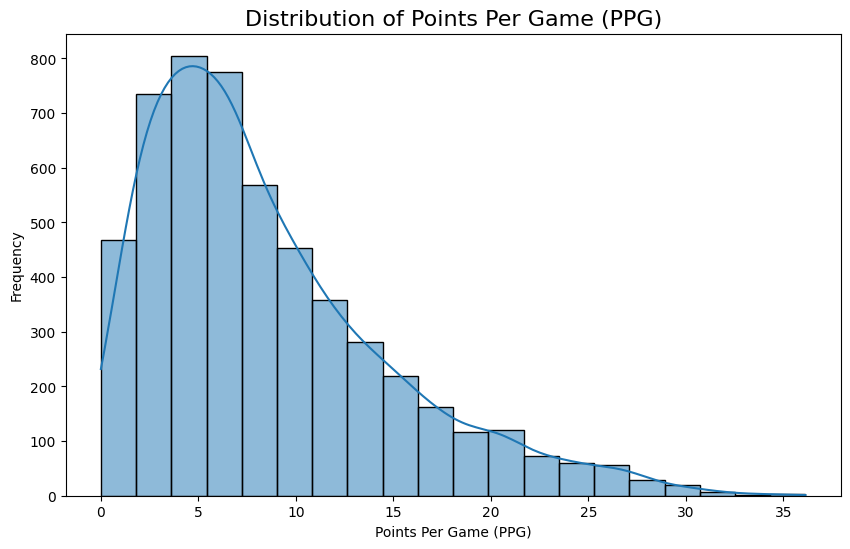

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histogram for Points Per Game (PPG)
plt.figure(figsize=(10, 6))
sns.histplot(merged_player_stats_combined['PPG'], bins=20, kde=True)
plt.title('Distribution of Points Per Game (PPG)', fontsize=16)
plt.xlabel('Points Per Game (PPG)')
plt.ylabel('Frequency')
plt.show()

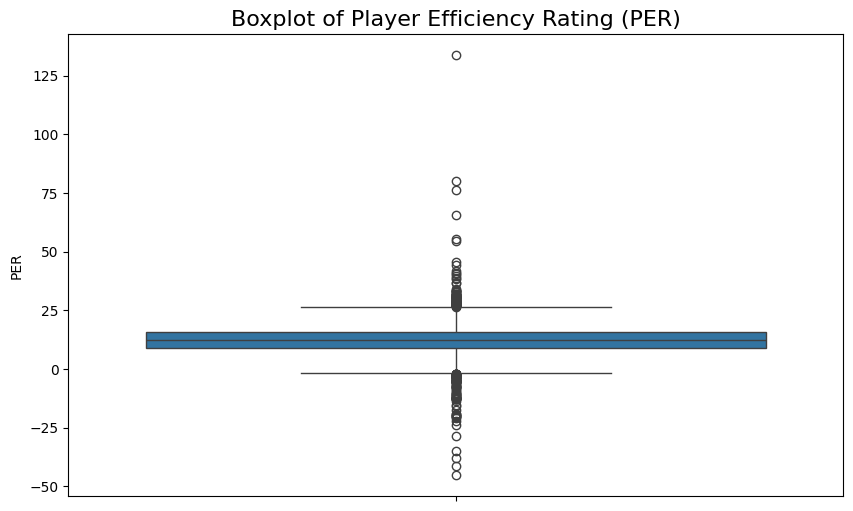

In [70]:
# Boxplot for Player Efficiency Rating (PER)
plt.figure(figsize=(10, 6))
sns.boxplot(y='PER', data=merged_player_stats_combined)
plt.title('Boxplot of Player Efficiency Rating (PER)', fontsize=16)
plt.show()

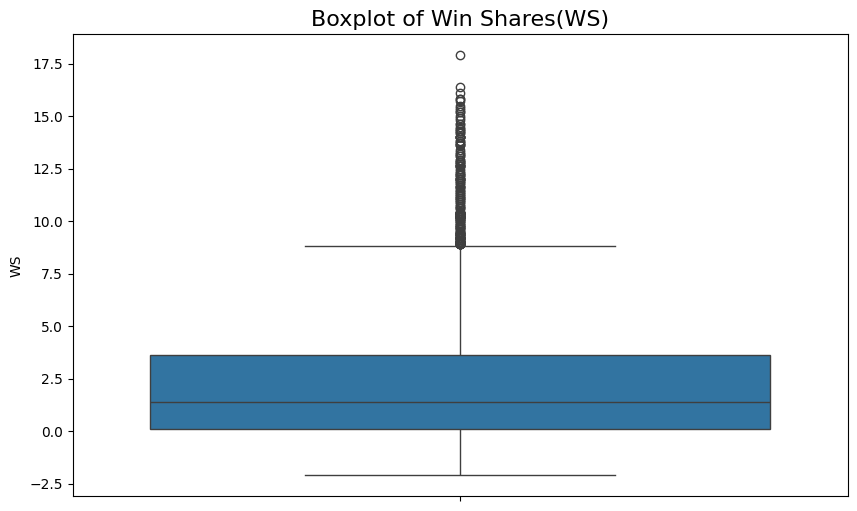

In [71]:
# Boxplot for Win Shares (WS)
plt.figure(figsize=(10, 6))
sns.boxplot(y='WS', data=merged_player_stats_combined)
plt.title('Boxplot of Win Shares(WS)', fontsize=16)
plt.show()

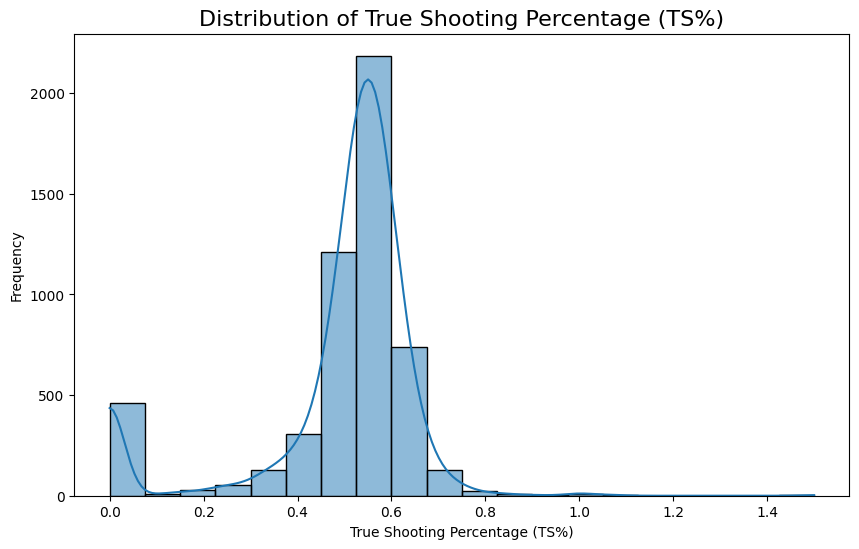

In [74]:
# Histogram for True Shooting Percentage (TS%)
plt.figure(figsize=(10, 6))
sns.histplot(merged_player_stats_combined['TS%'], bins=20, kde=True)
plt.title('Distribution of True Shooting Percentage (TS%)', fontsize=16)
plt.xlabel('True Shooting Percentage (TS%)')
plt.ylabel('Frequency')
plt.show()

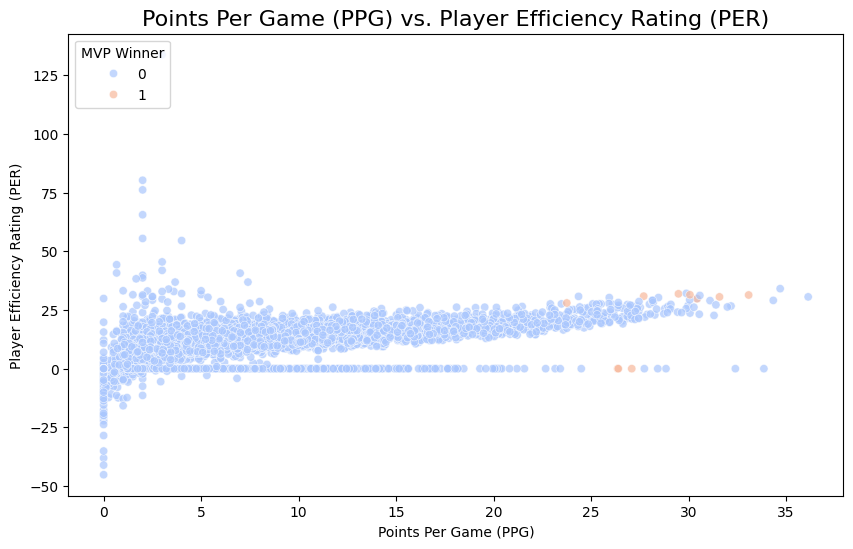

In [75]:
# Scatter plot for PPG vs PER
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PPG', y='PER', data=merged_player_stats_combined, hue='MVP_Winner', palette='coolwarm', alpha=0.7)
plt.title('Points Per Game (PPG) vs. Player Efficiency Rating (PER)', fontsize=16)
plt.xlabel('Points Per Game (PPG)')
plt.ylabel('Player Efficiency Rating (PER)')
plt.legend(title='MVP Winner', loc='upper left')
plt.show()

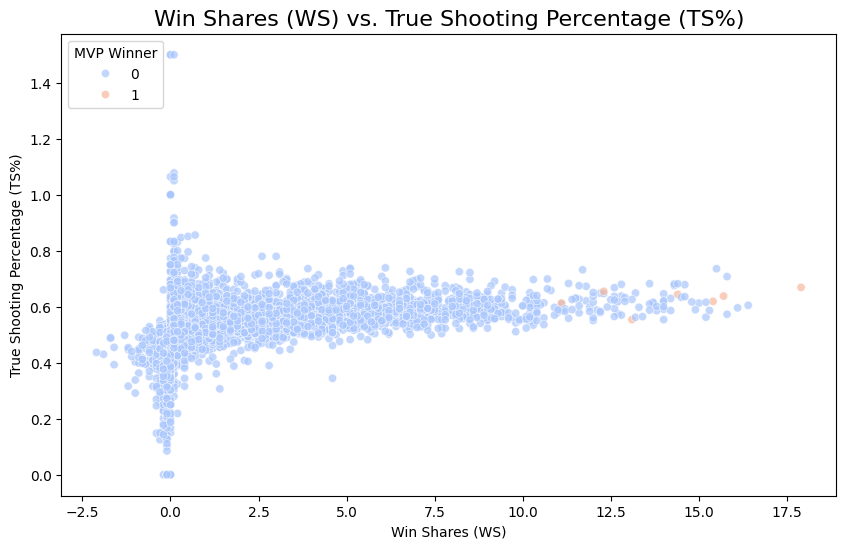

In [76]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='WS', y='TS%', data=merged_player_stats_combined, hue='MVP_Winner', palette='coolwarm', alpha=0.7)
plt.title('Win Shares (WS) vs. True Shooting Percentage (TS%)', fontsize=16)
plt.xlabel('Win Shares (WS)')
plt.ylabel('True Shooting Percentage (TS%)')
plt.legend(title='MVP Winner', loc='upper left')
plt.show()

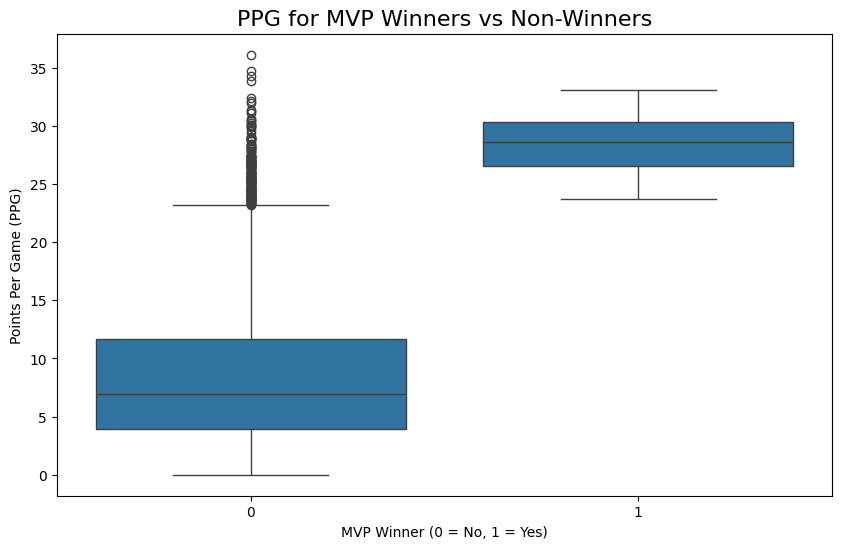

In [78]:
# Boxplot comparing PPG for MVP winners vs non-winners
plt.figure(figsize=(10, 6))
sns.boxplot(x='MVP_Winner', y='PPG', data=merged_player_stats_combined)
plt.title('PPG for MVP Winners vs Non-Winners', fontsize=16)
plt.xlabel('MVP Winner (0 = No, 1 = Yes)')
plt.ylabel('Points Per Game (PPG)')
plt.show()

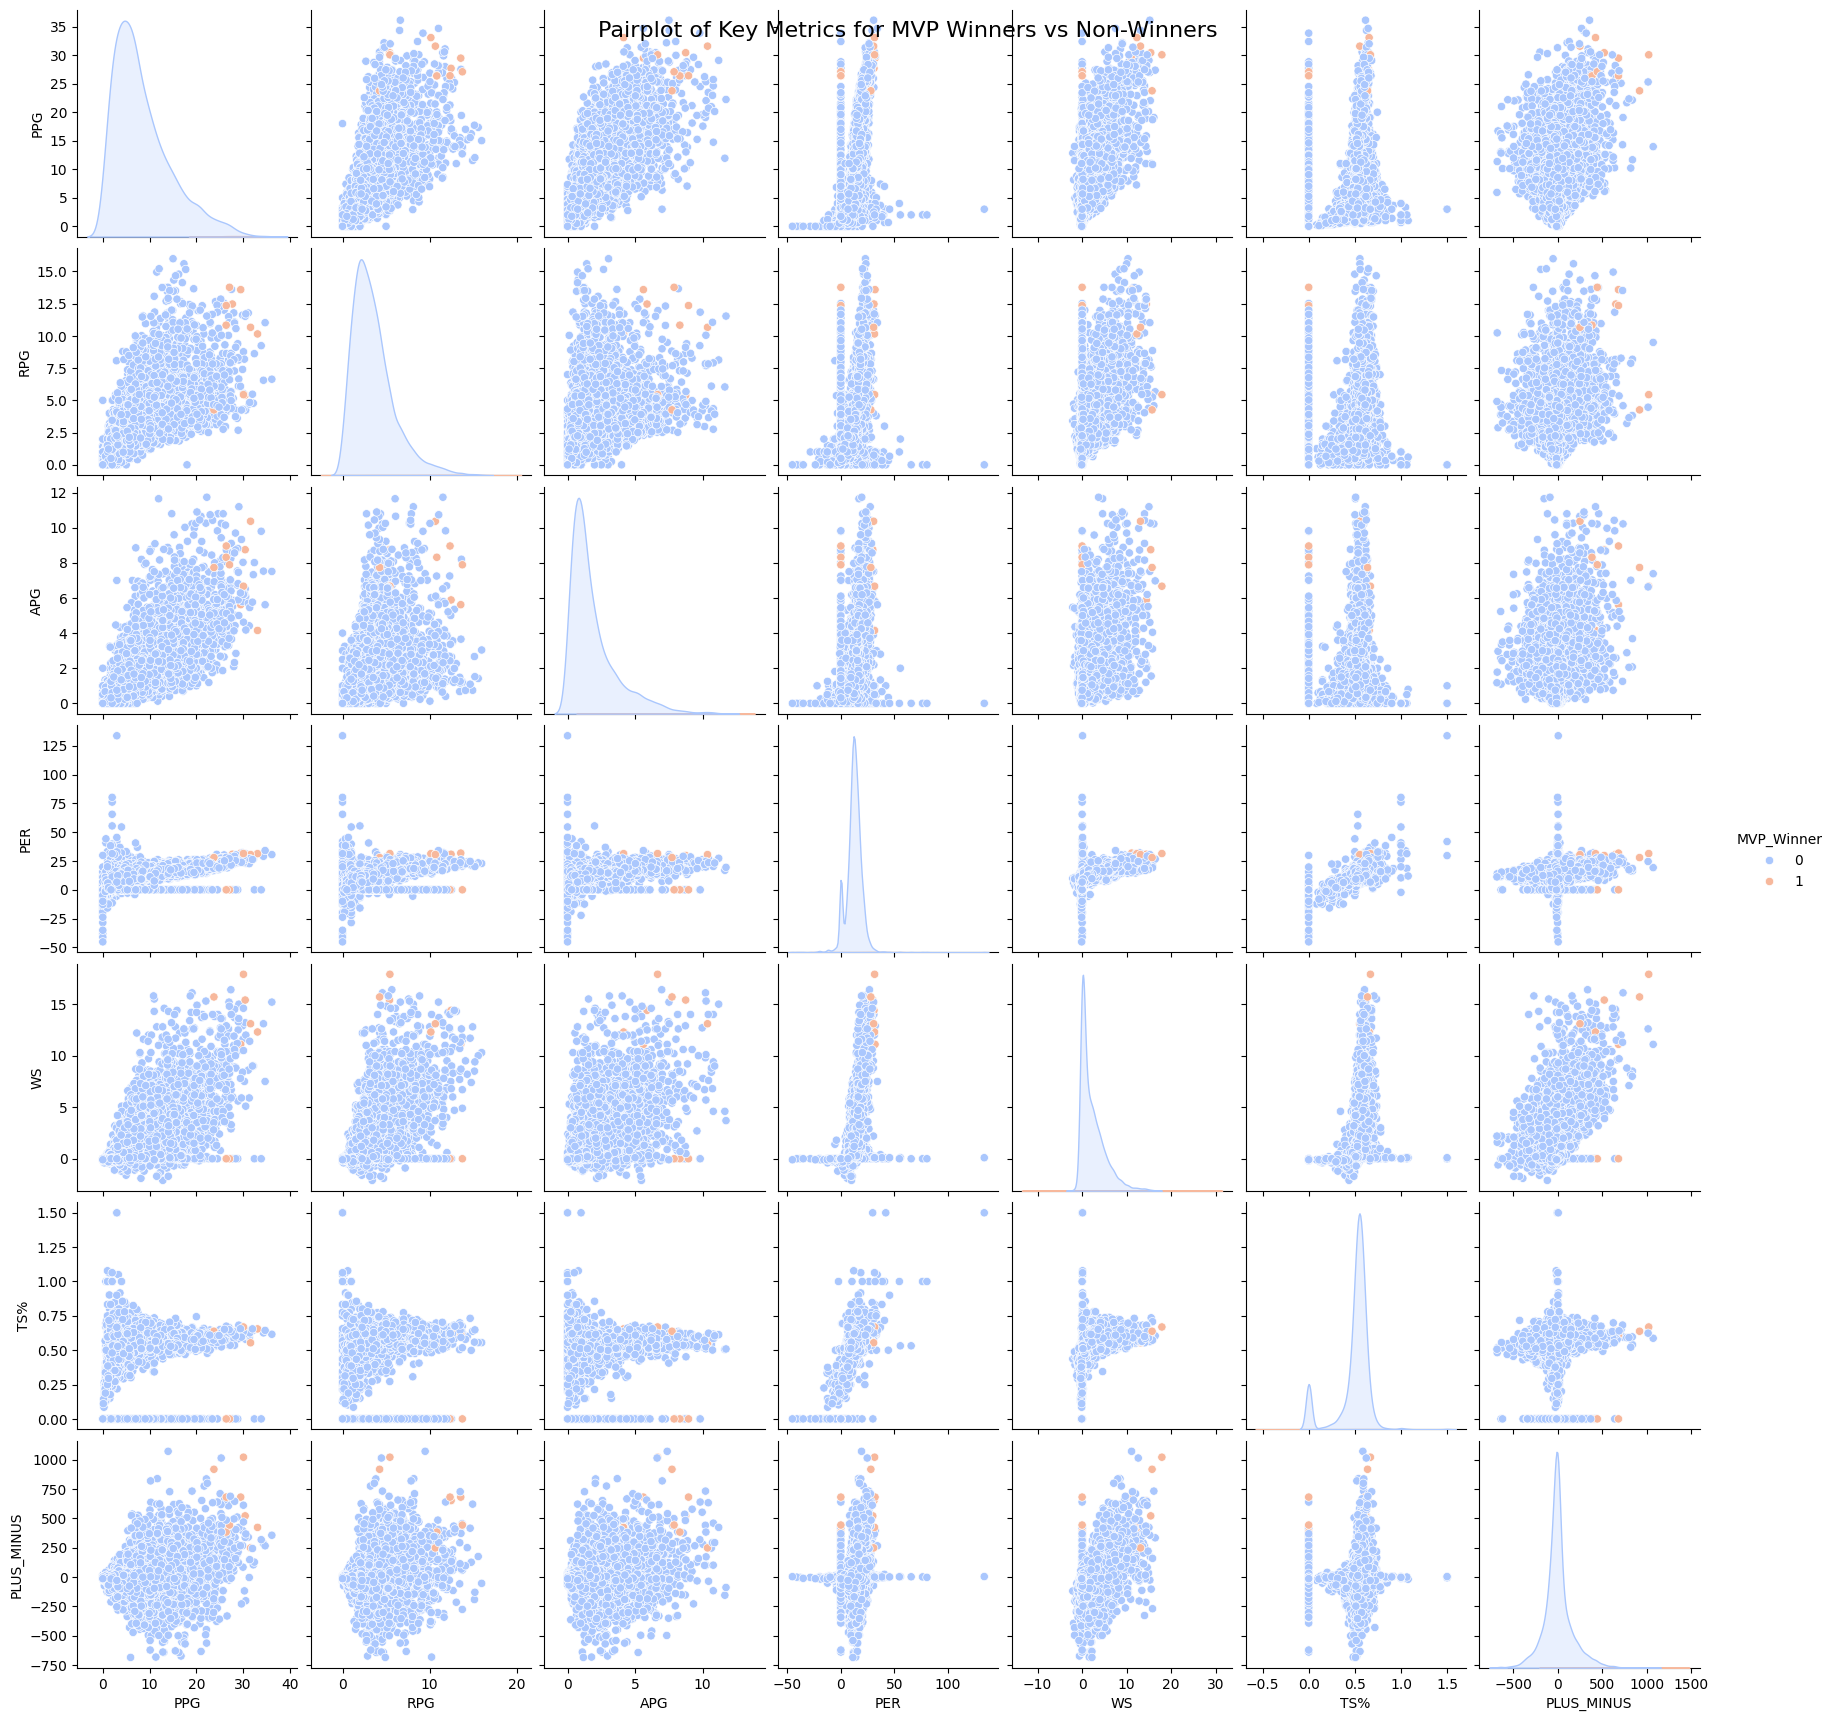

In [80]:
# Pairplot for key metrics and MVP winners
sns.pairplot(merged_player_stats_combined[['PPG', 'RPG', 'APG', 'PER', 'WS', 'TS%', 'MVP_Winner', 'PLUS_MINUS']], hue='MVP_Winner', palette='coolwarm')
plt.suptitle('Pairplot of Key Metrics for MVP Winners vs Non-Winners', fontsize=16)
plt.show()

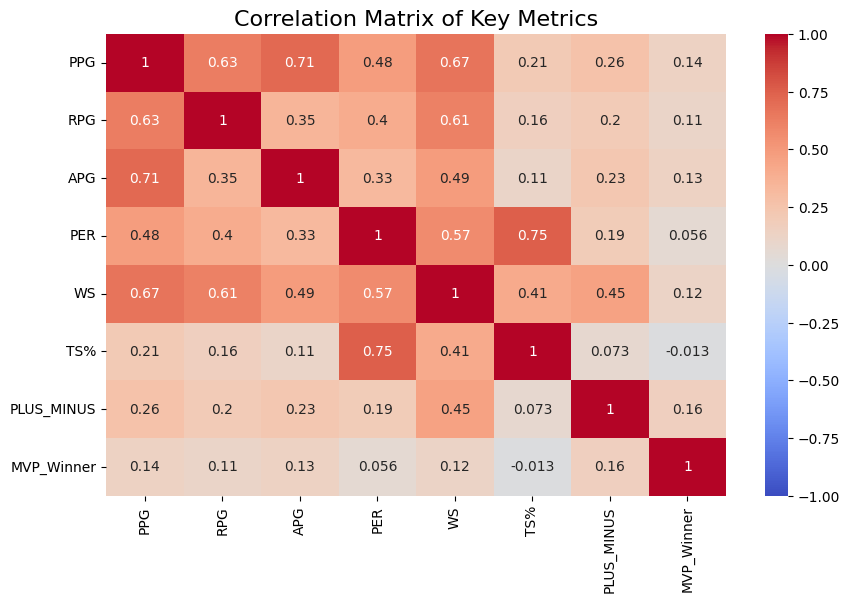

In [81]:
# Correlation matrix
corr_matrix = merged_player_stats_combined[['PPG', 'RPG', 'APG', 'PER', 'WS', 'TS%', 'PLUS_MINUS', 'MVP_Winner']].corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Key Metrics', fontsize=16)
plt.show()


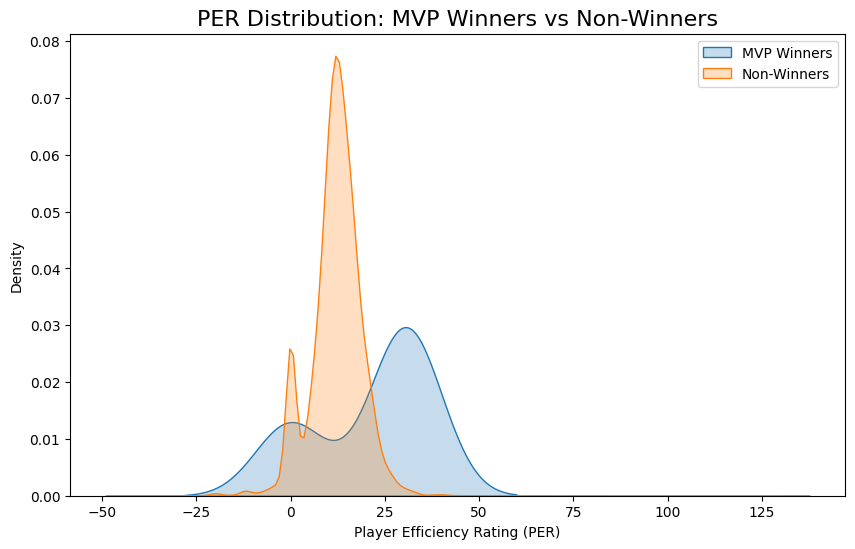

In [83]:
# KDE Plot comparing PER distribution for MVP winners vs non-winners
plt.figure(figsize=(10, 6))
sns.kdeplot(merged_player_stats_combined[merged_player_stats_combined['MVP_Winner'] == 1]['PER'], label='MVP Winners', fill=True)
sns.kdeplot(merged_player_stats_combined[merged_player_stats_combined['MVP_Winner'] == 0]['PER'], label='Non-Winners', fill=True)
plt.title('PER Distribution: MVP Winners vs Non-Winners', fontsize=16)
plt.xlabel('Player Efficiency Rating (PER)')
plt.ylabel('Density')
plt.legend()
plt.show()

There are a lot of good insights that can be gained from the above plots and chart.

For instance from the correlation matrix we can gather:
- PPG (Points Per Game) has a strong positive correlation with APG (0.71), RPG (0.63), and Win Shares (0.67), indicating that higher scoring players also tend to contribute more in assists and rebounds, as well as overall team success.
-PER (Player Efficiency Rating) is highly correlated with TS% (0.75) and WS (0.57), showing that players with higher efficiency ratings also tend to have better shooting efficiency and contribute more to wins.
-WS (Win Shares) has a strong correlation with many metrics: PPG (0.67), RPG (0.61), and PER (0.57), confirming that players who score more, rebound more, and have better efficiency contribute more to team success.
-MVP_Winner is weakly correlated with most variables, with the highest correlation being with PLUS_MINUS (0.16), which suggests that MVP players tend to have a slightly higher impact on the court, but MVP selection isn't strongly tied to any one stat.

From the pairplot for MVP vs Non-MVP players it can be gathered that:

- PPG, RPG, and APG: MVP winners generally perform better in these areas, as evidenced by the scatter plots where MVP winners (orange points) cluster toward the higher end of these stats.
- PER and WS: MVP winners tend to have higher PER and Win Shares, though there is overlap between MVP winners and non-winners. This suggests that while higher efficiency and win contribution matter, they are not the only factors influencing MVP selection.
- TS%: There doesn't appear to be a strong relationship between True Shooting % and MVP selection. MVP winners have a broad range of TS% values, overlapping significantly with non-winners.

And from the KDE plot we can gather:
- MVP Winners: The blue curve shows that MVP winners generally have a higher PER. Most MVP winners have PER values above 15, with a peak around 20-30. Some MVP winners have very high PER values, likely representing top-tier performers.
- Non-Winners: The orange curve peaks significantly around the 10-20 range, indicating that most non-winners have more moderate PER values, with very few reaching the higher PER values seen in MVP winners.
- The two curves overlap somewhat, but it's clear that MVP winners tend to have higher PER values, supporting the idea that efficiency and overall player impact are important factors for MVP selection.

# **Key Findings**

Through the EDA performed on the dataset I created, I was able to walk away with these key insights:

- Scoring, Rebounding, and Assisting: Players who excel in these areas (as seen from the correlation matrix and pairplot) tend to contribute more to team success and are more likely to be considered for MVP.
- Efficiency and Win Contribution: High PER and Win Shares are strong indicators of overall player performance, and MVP winners generally outperform non-winners in these areas. However, there are exceptions, as some MVP winners may not lead the league in PER or WS.
- Weak Relationship between Stats and MVP Selection: The correlation of MVP_Winner with individual metrics is weak, suggesting that MVP selection is influenced by a combination of factors, including but not limited to statistics, team success, and narrative.

**Hypothesis 1: Certain stats, like points per game (PPG), player efficiency rating (PER), or team success (wins), may be strong indicators of MVP candidates.**

**Insights:**

- Points Per Game (PPG) shows a moderate correlation with MVP selection (0.14). While it's not the strongest predictor, it's clear from the KDE plot and the pairplot that MVP winners tend to have higher PPG than non-winners. However, many non-MVP players also score highly, suggesting that while PPG is important, it’s not the only deciding factor.
- Player Efficiency Rating (PER) is another important stat. The KDE plot clearly shows that MVP winners generally have higher PER values. Though the correlation between PER and MVP selection is weak (0.056), this is likely because PER overlaps for some non-winners and MVP candidates. However, PER still distinguishes top candidates as most MVP winners have PER values above 20.
- Win Shares (WS) and Team Success (W_PCT) show moderate correlations with MVP selection (WS 0.12, W_PCT 0.14). This aligns with the idea that team success and contribution to wins play a role in MVP selection but, again, are not the only deciding factors.

**Conclusion on Hypothesis 1:**

PPG, PER, and Win Shares are important, but none of these individual stats alone are highly predictive of MVP selection. They are likely part of a broader context that includes narrative, team success, and other intangibles.
The hypothesis is partially supported. While high PPG, PER, and WS matter, they do not provide strong predictive power alone.


**Hypothesis 2: More advanced metrics (e.g., Win Shares, Box Plus-Minus) may provide better predictive power than traditional stats (points, rebounds, assists).**

**Insights:**

- Win Shares (WS) and PER (considered advanced metrics) do distinguish MVP winners from non-winners, as seen in the scatter plots and the KDE plot. MVP winners tend to cluster in the higher range for these metrics.
- Traditional stats like Points (PPG), Rebounds (RPG), and Assists (APG) are still moderately correlated with MVP selection, and the pairplot shows that MVP candidates perform well across these areas. However, the correlation matrix shows that advanced stats like PER and TS% are more closely related to Win Shares, which correlates somewhat with MVP selection.
- Box Plus-Minus (PLUS_MINUS) shows a weak correlation (0.16) with MVP selection, suggesting that it isn’t as strong a predictor as other advanced stats like PER or WS.


**Conclusion on Hypothesis 2:**

Advanced metrics (PER, WS, BPM) are valuable but not definitively better than traditional stats. PER, for instance, is good at distinguishing top performers, but traditional stats like PPG and APG also contribute to the overall evaluation.
This hypothesis is partially supported. Advanced metrics provide additional insight but do not completely replace traditional stats as predictors of MVP selection.

### **Research Question: Which player statistics are most predictive of winning the MVP award?**
**Based on the analysis, the most predictive statistics for MVP selection are:**

- Player Efficiency Rating (PER): Although PER overlaps between MVP winners and non-winners, MVP candidates consistently rank higher in PER, as seen in the KDE plot and pairplot. PER reflects all-around efficiency, and higher PER correlates with stronger performances.
- Win Shares (WS): WS indicates the contribution to team success, and MVP winners tend to have higher WS values. This reflects both individual performance and team success, which are important for MVP consideration.
- Points Per Game (PPG): While PPG alone isn't highly predictive, high scorers are often MVP candidates. The pairplot shows that PPG correlates well with other key metrics, such as assists and PER, and contributes to overall MVP candidacy.
- Team Success (W_PCT): While not shown to be the strongest predictor, team success does play a role, and MVP candidates tend to come from winning teams.

# **Conclusion**

This project explored the factors most predictive of NBA MVP selection, focusing on both traditional stats (like Points Per Game) and advanced metrics (such as Player Efficiency Rating and Win Shares). The analysis shows that while PER, WS, and PPG are important indicators, no single statistic definitively predicts MVP outcomes. MVP winners tend to excel across multiple areas, combining individual dominance with team success. However, the selection process is multifaceted, influenced not only by on-court performance but also by broader factors like narrative and team dynamics. In essence, while advanced metrics provide valuable insight, traditional stats remain significant, and MVP selection ultimately reflects a blend of quantitative performance and qualitative considerations.